In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

pima-indians-diabetes.data.csv



In [10]:
filename = '../input/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df=pd.read_csv("../input/"+filename,names=names)
skew=df.skew()

In [11]:
print(skew)
#for normally distributed data skewness should be close to zero. If skewness>0 then
#it means that there is more weight on the left tail of the distribution and if skewness<0 then it means that
# there is more weight on the right tail of the distribution

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64


In [12]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


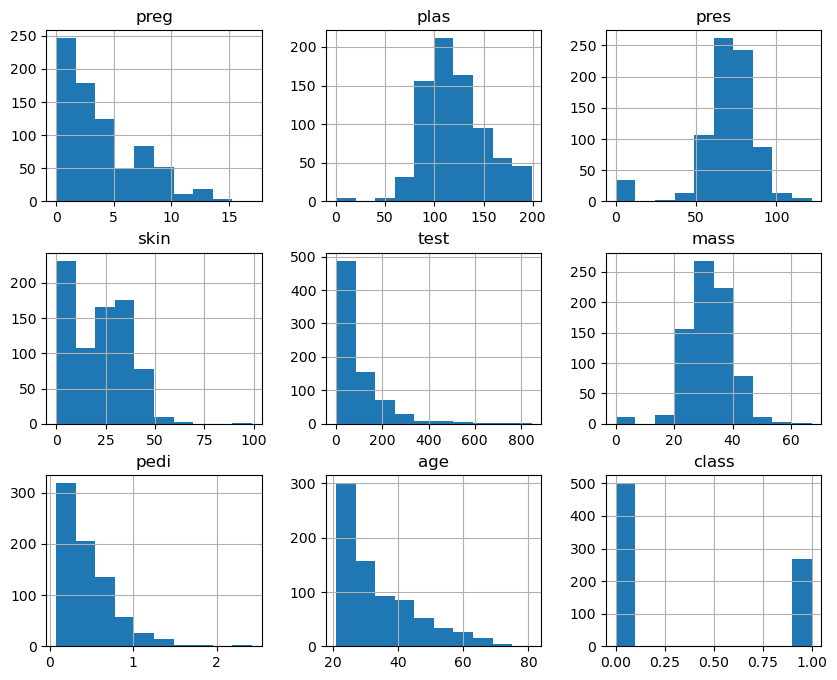

In [13]:
df.hist(figsize=(10,8))
plt.show()

<Axes: >

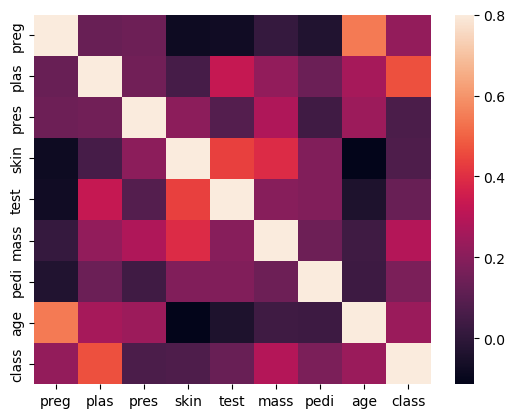

In [14]:
corr=df.corr()
sns.heatmap(corr,vmax=0.8)

<Axes: xlabel='class', ylabel='preg'>

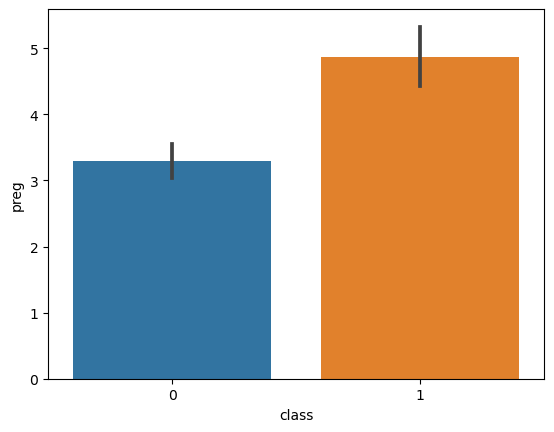

In [15]:
import seaborn as sns

# Assuming "class" and "preg" are valid column names in the DataFrame df
sns.barplot(x="class", y="preg", data=df)


<Axes: xlabel='class', ylabel='preg'>

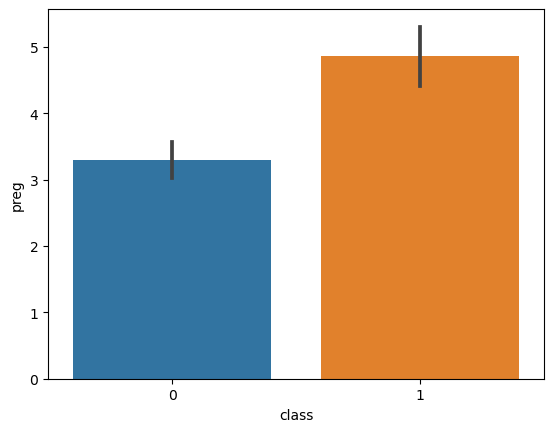

In [16]:
#lets see the relationship between our independent variables and dependent variable(Class)
sns.barplot(x="class", y="preg",data=df)

<Axes: xlabel='class', ylabel='plas'>

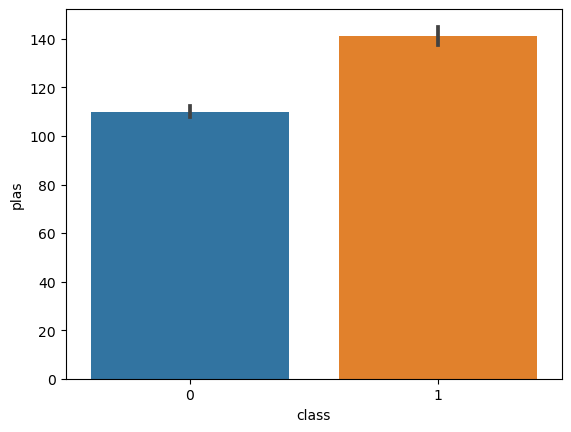

In [17]:
sns.barplot(x="class",y="plas",data=df)

<Axes: xlabel='class', ylabel='pres'>

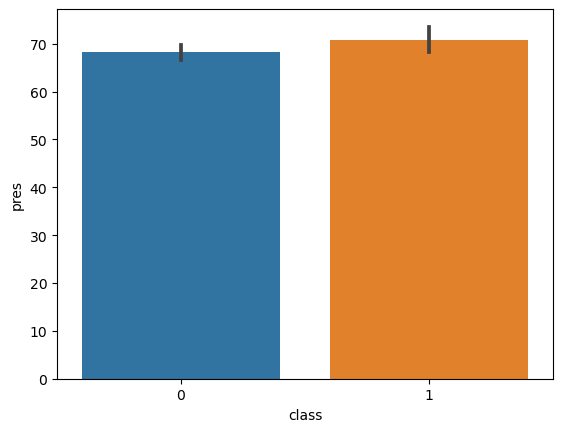

In [18]:
sns.barplot(x="class",y="pres",data=df)

<Axes: xlabel='class', ylabel='skin'>

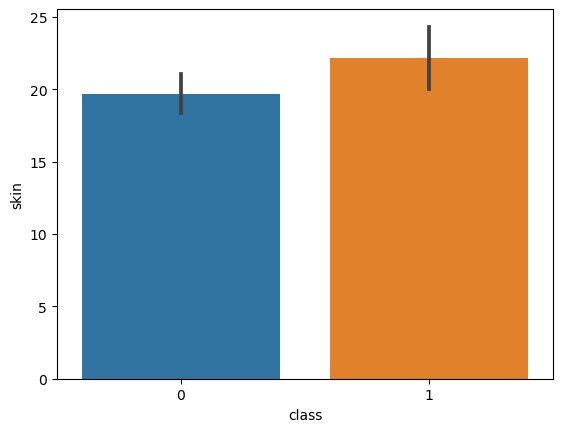

In [19]:
sns.barplot(x="class",y="skin",data=df)

<Axes: xlabel='class', ylabel='test'>

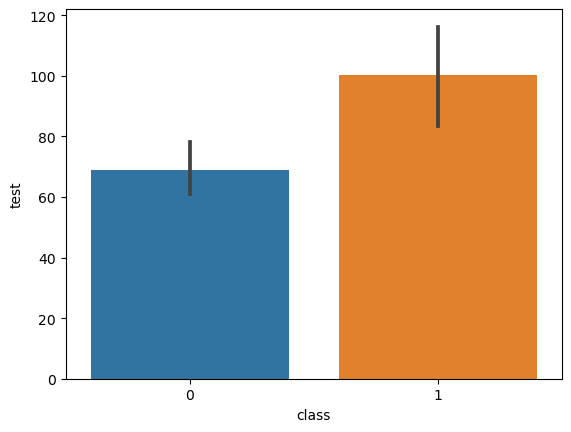

In [20]:
sns.barplot(x="class",y="test",data=df)

<Axes: xlabel='class', ylabel='mass'>

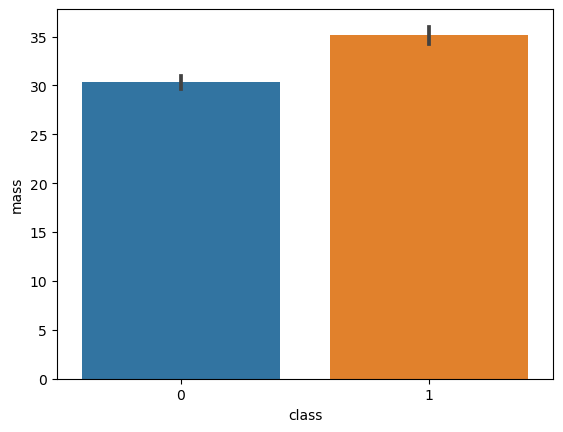

In [21]:
sns.barplot(x="class",y="mass",data=df)

<Axes: xlabel='class', ylabel='pedi'>

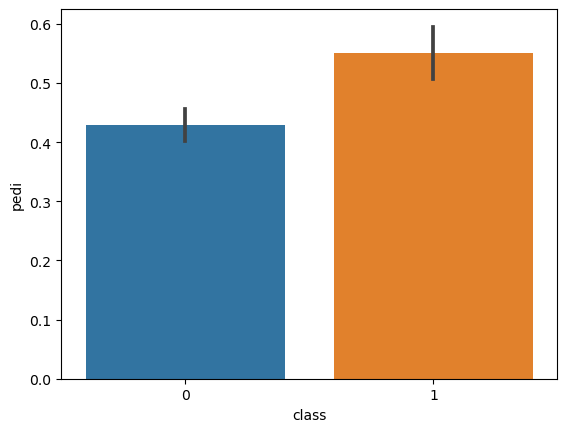

In [22]:
sns.barplot(x="class", y="pedi",data=df)

<Axes: xlabel='class', ylabel='age'>

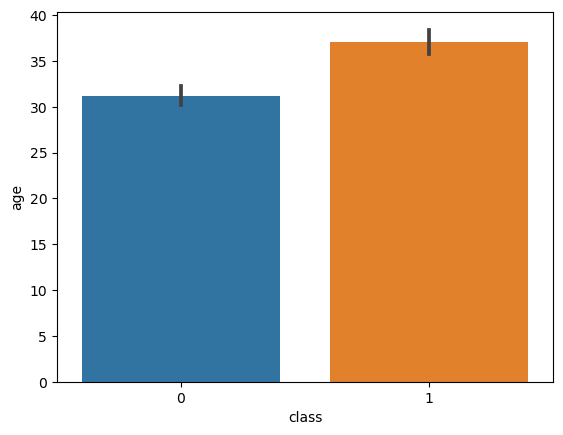

In [23]:
sns.barplot(x="class", y="age",data=df)

In [24]:
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X.head()


,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
#Spliiting our dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
#Applying Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#Applying logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [28]:
#Calculating Y_predection
y_pred=classifier.predict(X_test)

In [29]:
#Forming a confusion matrix to check our accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[98  9]
 [18 29]]


In [30]:
acc=(98+29)/(98+29+18+9)
print(acc)
#We got an accuracy of 82.46%

0.8246753246753247
